In [20]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

le = LabelEncoder()
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [21]:
dataset = pd.read_csv('train_data4.csv')
print(dataset.head())

   resistance_thumb  bend_thumb  resistance_index  bend_index  resistance_mid  \
0          11311.04           7          13173.60          19        14347.83   
1          10923.00           5          13173.60          19        13736.25   
2          10923.00           5          13173.60          19        14347.83   
3          11311.04           7          13173.60          19        14347.83   
4          10923.00           5          12654.23          15        13736.25   

   bend_mid  resistance_ring  bend_ring  resistance_little  bend_little   x  \
0        26         12173.33         13           12173.33           13  66   
1        22         11726.79         10           12654.23           15  65   
2        26         11311.04          7           12173.33           13  67   
3        26         11311.04          7           12654.23           15  66   
4        22         11311.04          7           12173.33           13  63   

    y    z  stage  
0  50 -119      0 

In [28]:
X = dataset.drop("stage", axis=1)
y = dataset["stage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def pick_best(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    clf_pred = model.predict(X_test)
    return clf_pred
    


model = pick_best(X_train, X_test, y_train, y_test)


In [32]:
from micromlgen import port

model = pick_best()
print(port(model))


TypeError: pick_best() missing 4 required positional arguments: 'X_train', 'X_test', 'y_train', and 'y_test'

In [3]:
np.isnan(dataset.any()) #and gets False
np.isfinite(dataset.all()) #and gets True

resistance_thumb     True
bend_thumb           True
resistance_index     True
bend_index           True
resistance_mid       True
bend_mid             True
resistance_ring      True
bend_ring            True
resistance_little    True
bend_little          True
x                    True
y                    True
z                    True
stage                True
dtype: bool

In [4]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
dataset.isnull().sum()

resistance_thumb     0
bend_thumb           0
resistance_index     0
bend_index           0
resistance_mid       0
bend_mid             0
resistance_ring      0
bend_ring            0
resistance_little    0
bend_little          0
x                    0
y                    0
z                    0
stage                0
dtype: int64

In [6]:
def cleandata(dataset):
    for column in dataset.columns:
        if dataset[column].dtype == type(object):
            le = LabelEncoder()
            dataset[column]=le.fit_transform(dataset[column])
    return dataset

In [7]:
dataset=cleandata(dataset)
print(dataset.head())

   resistance_thumb  bend_thumb  resistance_index  bend_index  resistance_mid  \
0          11311.04           7          13173.60          19        14347.83   
1          10923.00           5          13173.60          19        13736.25   
2          10923.00           5          13173.60          19        14347.83   
3          11311.04           7          13173.60          19        14347.83   
4          10923.00           5          12654.23          15        13736.25   

   bend_mid  resistance_ring  bend_ring  resistance_little  bend_little   x  \
0        26         12173.33         13           12173.33           13  66   
1        22         11726.79         10           12654.23           15  65   
2        26         11311.04          7           12173.33           13  67   
3        26         11311.04          7           12654.23           15  66   
4        22         11311.04          7           12173.33           13  63   

    y    z  stage  
0  50 -119      0 

In [8]:
def split_feature_class(dataset,feature):
    features = dataset.drop(feature,axis=1) #get all except income
    labels = dataset[feature].copy() #get only income
    return features,labels
    

In [13]:
for i in range(10):
    training_set, test_set = train_test_split(dataset,test_size=0.2)

    #train
    train_features, train_labels = split_feature_class(training_set,"stage")
    #แบ่งเป็น feature กับ label 

    #test
    test_features, test_labels = split_feature_class(test_set,"stage")
    
    model = GaussianNB() 
    model.fit(train_features, train_labels)
    clf_pred = model.predict(test_features)
    clf_pred
    
    print("Accuracy = ",accuracy_score(test_labels,clf_pred))

Accuracy =  0.563265306122449
Accuracy =  0.5836734693877551
Accuracy =  0.6979591836734694
Accuracy =  0.5959183673469388
Accuracy =  0.6204081632653061
Accuracy =  0.5795918367346938
Accuracy =  0.5795918367346938
Accuracy =  0.6081632653061224
Accuracy =  0.7183673469387755
Accuracy =  0.5755102040816327


In [14]:
from xml.parsers.expat import model
from micromlgen import port

clf = model()
print(port(clf))


TypeError: 'module' object is not callable

In [26]:
#spilt train, test
training_set, test_set = train_test_split(dataset,test_size=0.3)

#train
train_features, train_labels = split_feature_class(training_set,"stage")
#แบ่งเป็น feature กับ label 

#test
test_features, test_labels = split_feature_class(test_set,"stage")

training_set.shape, test_set.shape


((856, 14), (368, 14))

In [27]:
print(train_features)

     resistance_thumb  bend_thumb  resistance_index  bend_index  \
163          19528.23          57          30360.00         122   
493          11726.79          10          12173.33          13   
25           33429.00         140          47897.14         227   
792          18425.00          50          25638.46          93   
992          30360.00         122          37180.00         163   
..                ...         ...               ...         ...   
135          11311.04           7          33429.00         140   
480          22176.00          73          25638.46          93   
308          12173.33          13          13173.60          19   
169          23783.57          82          23783.57          82   
806           9900.00           0          11726.79          10   

     resistance_mid  bend_mid  resistance_ring  bend_ring  resistance_little  \
163        13173.60        19         12654.23         15           11311.04   
493        25638.46        93      

In [28]:
print(train_labels)

163    3
493    3
25     4
792    1
992    2
      ..
135    3
480    3
308    3
169    3
806    0
Name: stage, Length: 856, dtype: int64


In [29]:
#สร้าง model
model = GaussianNB() 
model.fit(train_features, train_labels)


GaussianNB()

In [30]:
#predict
clf_pred = model.predict(test_features)
clf_pred

#ควรได้ซัก 80+

array([0, 0, 3, 0, 1, 3, 0, 3, 0, 2, 2, 0, 1, 0, 4, 3, 0, 0, 1, 1, 0, 1,
       1, 4, 2, 3, 3, 1, 1, 3, 0, 4, 5, 3, 3, 4, 4, 4, 0, 1, 3, 2, 2, 4,
       3, 4, 0, 3, 2, 2, 2, 0, 4, 0, 0, 3, 3, 0, 0, 4, 3, 1, 0, 0, 2, 0,
       1, 0, 0, 2, 4, 2, 1, 0, 3, 0, 4, 2, 1, 1, 0, 3, 0, 2, 3, 0, 2, 2,
       3, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 4, 2, 0, 0,
       1, 3, 2, 0, 3, 0, 3, 1, 3, 3, 0, 0, 3, 0, 1, 2, 0, 2, 4, 0, 1, 3,
       0, 0, 4, 2, 4, 0, 0, 3, 3, 1, 0, 1, 0, 2, 0, 2, 3, 1, 2, 3, 3, 0,
       2, 3, 4, 0, 1, 0, 0, 0, 1, 4, 3, 0, 1, 0, 0, 0, 4, 0, 0, 0, 3, 2,
       0, 2, 2, 5, 2, 3, 3, 0, 4, 1, 2, 3, 3, 0, 3, 3, 1, 0, 0, 1, 4, 3,
       0, 0, 0, 2, 0, 0, 3, 4, 0, 3, 2, 0, 4, 3, 3, 1, 3, 1, 1, 0, 4, 3,
       0, 2, 0, 3, 1, 2, 0, 0, 3, 1, 1, 3, 1, 2, 3, 0, 2, 4, 0, 3, 2, 2,
       3, 3, 0, 3, 2, 0, 0, 4, 2, 3, 1, 1, 0, 1, 3, 3, 3, 4, 0, 5, 3, 2,
       0, 0, 0, 0, 3, 2, 0, 0, 1, 4, 0, 3, 1, 4, 0, 4, 3, 0, 3, 4, 3, 0,
       0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 2, 2, 1, 4, 3,

In [31]:
test_features.head()

,resistance_thumb,bend_thumb,resistance_index,bend_index,resistance_mid,bend_mid,resistance_ring,bend_ring,resistance_little,bend_little,x,y,z
666,10219.69,1,9900.00,0,9599.12,-2,12173.33,13,11311.04,7,57,28,-103
1021,12173.33,13,12654.23,15,12173.33,13,10923.00,5,11726.79,10,-43,32,-63
397,11726.79,10,22176.00,73,11726.79,10,11726.79,10,12654.23,15,76,37,-156
1178,10923.00,5,10560.00,3,10560.00,3,10560.00,3,11311.04,7,-29,82,-82
1204,15015.00,30,15015.00,30,10560.00,3,10219.69,1,13736.25,22,-30,82,-83


In [1]:
model.predict([[17437.89, 44, 15745.71, 34, 15015, 30,
              33429, 140, 11726.79, 10, 67, 30, -105]])


NameError: name 'model' is not defined

In [ ]:
print("Accuracy = ",accuracy_score(test_labels,clf_pred))

Accuracy =  0.7771739130434783


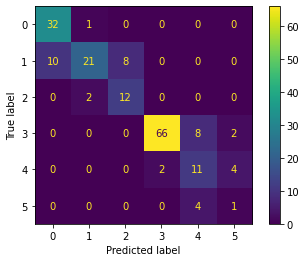

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(test_labels, clf_pred, labels= model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()